In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', 50) 
pd.set_option('display.max_rows', 500)
pd.set_option('display.float_format', lambda x: '%.5f' % x)
# параметры для корректного отображения таблиц и более удобного их анализа

In [7]:
#смотрим какие виды тоннажности есть
export['Тоннажность контейнера'].unique()

array(['40-футовые', '20-футовые', 'не конт. отправки', '45-футовые',
       '30-футовые'], dtype=object)

In [8]:
# делаем столбец с тоннажностью в числах. выделяем из строки только первые 2 символа
export['тоннаж'] = ([x[:2] for x in export['Тоннажность контейнера']])
# было выяснено, что не габаритные контейнеры всего в 69 перевозках из 6 тыс, поэтому убираем из выборки
export = export[export['тоннаж'] != 'не']
# переводим строки с цифрами в целочисленный формат
export['тоннаж'] = export['тоннаж'].astype(int)
# считаем суммарную массу путем умножения количества контейнеров на их объем
export['Суммарная масса'] = export['тоннаж']*export['Количество Контейнеров']

In [9]:
# пивот по количеству контейнеров
export.pivot_table(index='Подгруппа груза', values='Количество Контейнеров', aggfunc='sum').sort_values(by='Количество Контейнеров', ascending=False)

,Количество Контейнеров
Подгруппа груза,
ПИЛОМАТЕРИАЛЫ,181324
СМОЛЫ СИНТЕТИЧЕСКИЕ И ПЛА,39879
БУМАГА И КАРТОН,26548
ЦЕЛЛЮЛОЗА И МАССА ДРЕВЕСН,24682
СРЕДСТВА ТРАНСПОРТИРОВАНИ,14165
МЕТАЛЛЫ ЦВЕТНЫЕ И ИХ СПЛА,12489
МАСЛО РАСТИТЕЛЬНОЕ И ЕГО,9632
РУДЫ И КОНЦЕНТРАТЫ ЦВЕТНЫ,8132
ПРОИЗВОДНЫЕ УГЛЕВОДОРОДОВ,7926


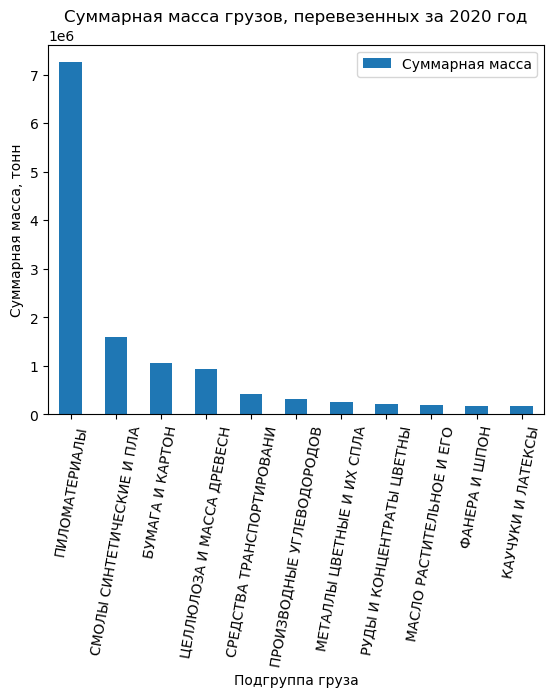

In [10]:
# пивот по сумарной массе
(
export.pivot_table(index='Подгруппа груза', values='Суммарная масса', aggfunc='sum').sort_values(by='Суммарная масса', ascending=False)
.head(11)  
.plot(kind='bar')
)
plt.xticks(rotation=80)
plt.xlabel('Подгруппа груза')
plt.ylabel('Суммарная масса, тонн')
plt.title('Суммарная масса грузов, перевезенных за 2020 год');

In [11]:
export['Станция отправления РФ'].value_counts()

УСТЬ-ИЛИМСК     409
ЕКАТЕРИН-ТОВ    341
КЛЕЩИХА         269
БАЗАИХА         257
БРАТСК          222
ИНЯ-ВОСТЧНАЯ    203
ТОБОЛЬСК        183
ИГИРМА          141
ХАБАРОВСК 2     132
СЕЛЯТИНО        128
ЛЕСОСИБИРСК     128
БАТАРЕЙНАЯ      128
КИРОВ-КОТЛС     124
НОВОСИБ-ВОСТ    119
СЫКТЫВКАР       119
МЫЛКИ           103
ЗАБАЙКАЛЬСК      97
КАРАБУЛА         89
СИЛИКАТНАЯ       88
КОЛЬЦОВО         87
ПРАВДИНСК        85
ЧУНОЯР           84
УССУРИЙСК        80
ХОВРИНО          79
БЛОЧНАЯ          79
ЛЕНА-ВОСТОЧ      77
КОПЫЛОВО         77
ВОРСИНО          70
СЕГЕЖА           67
ВЛАДИВОСТОК      64
ШУВАКИШ          63
ОМСК-ВОСТ        60
ХИМЗАВОДСКАЯ     59
КОСТЫЛЕВО        52
КАНСК-ЕНИС       52
ВЕЛИК.УСТЮГ      49
ТАЛЬЦЫ           48
САРЕПТА          47
ЗЛОБИНО          47
СОЛИКАМСК        44
ОНЕГА            43
ЧЕЛЯБИНСК-ГР     42
КУНЦЕВО 2        42
ТОМСК-ГРУЗ.      41
БЛАГОВЕЩЕНСК     41
ИРКУТСК-СОРТ     40
КРАСН. РЕЧКА     39
БАРНАУЛ          39
ПРЕДКОМБИНАТ     39
УЛЬКАН           38


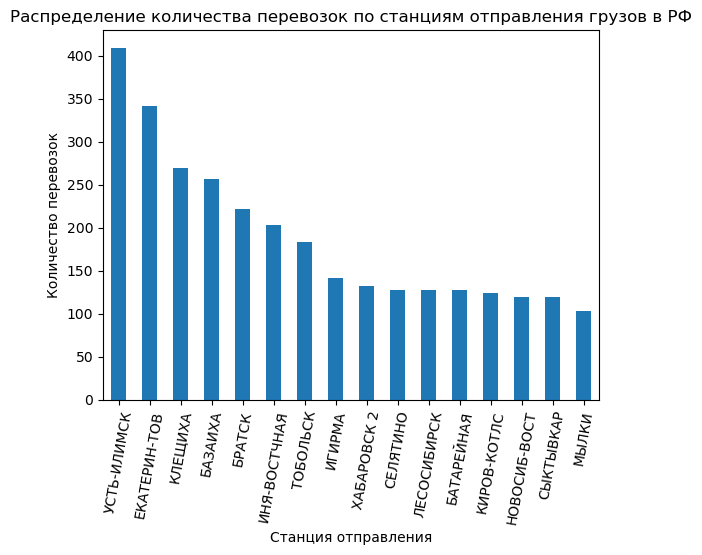

In [12]:
# таблица по городам станциям отправления грузов в РФ
(
export['Станция отправления РФ'].value_counts()
.head(16)  
.plot(kind='bar')
)
plt.xticks(rotation=80)
plt.xlabel('Станция отправления')
plt.ylabel('Количество перевозок')
plt.title('Распределение количества перевозок по станциям отправления грузов в РФ');

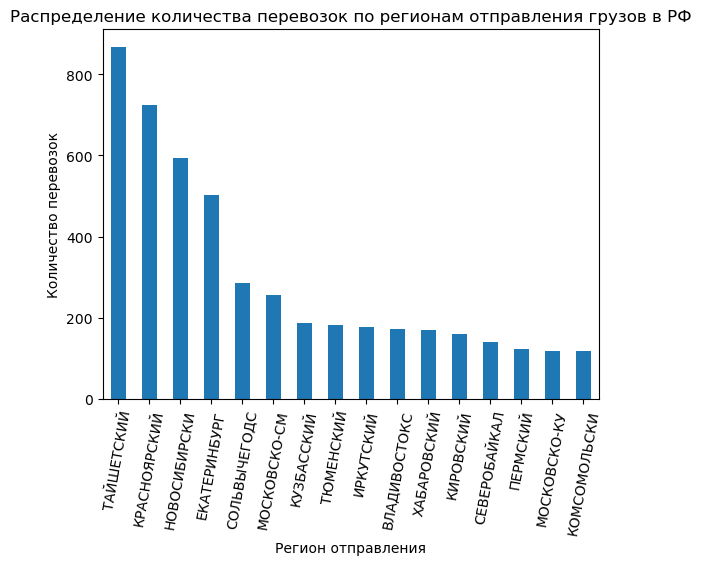

In [13]:
#таблица по регионам отправления в РФ
(
export['Регион отпр'].value_counts()
.head(16)  
.plot(kind='bar')
)
plt.xticks(rotation=80)
plt.xlabel('Регион отправления')
plt.ylabel('Количество перевозок')
plt.title('Распределение количества перевозок по регионам отправления грузов в РФ');

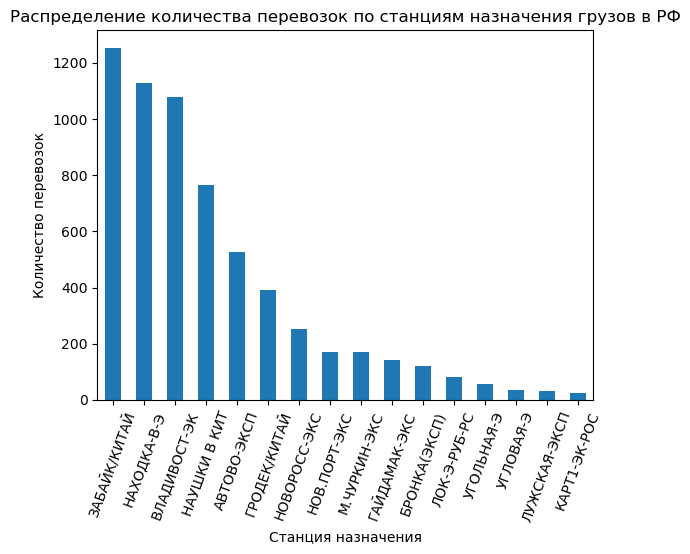

In [14]:
#таблица по станциям назначения в РФ
(
export['Станция назначения РФ'].value_counts()
.head(16)  
.plot(kind='bar')
)
plt.xticks(rotation=70)
plt.xlabel('Станция назначения')
plt.ylabel('Количество перевозок')
plt.title('Распределение количества перевозок по станциям назначения грузов в РФ');

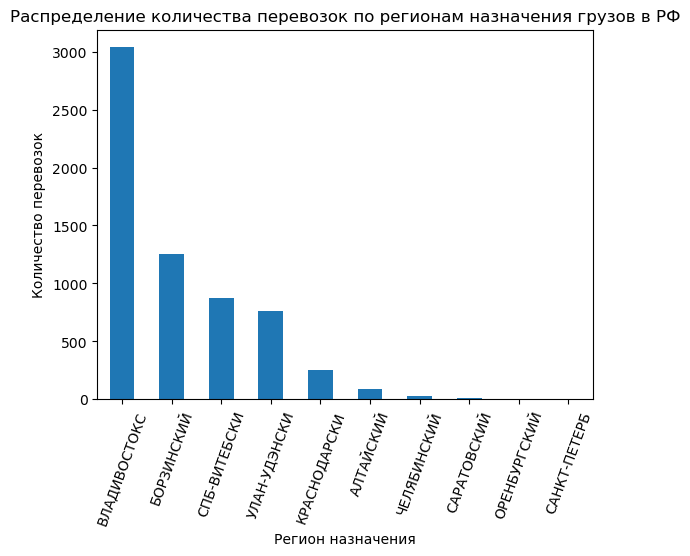

In [15]:
#таблица по региону назначения в РФ
(
export['Регион наз'].value_counts()
.head(11)  
.plot(kind='bar')
)
plt.xticks(rotation=70)
plt.xlabel('Регион назначения')
plt.ylabel('Количество перевозок')
plt.title('Распределение количества перевозок по регионам назначения грузов в РФ');

In [16]:
export['Призн станц назн РФ'].value_counts()

Припортовая станции    3758
Погранпереходы         2556
Name: Призн станц назн РФ, dtype: int64

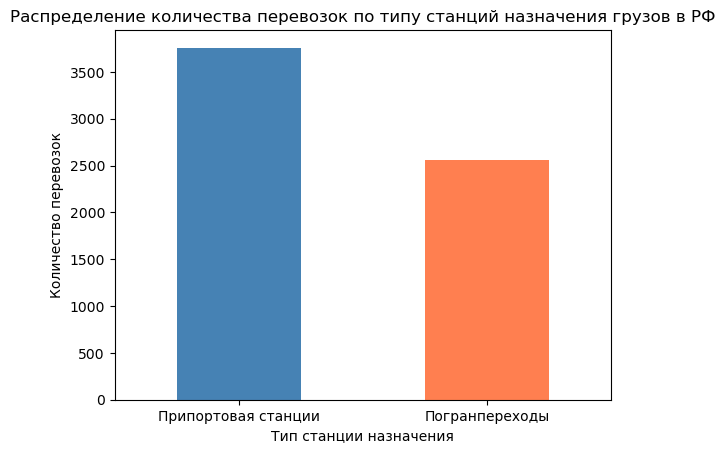

In [17]:
# тип станций назначения в РФ (график по типу перевозок сухопут/морские)
my_colors = ['steelblue','coral']
(
export['Призн станц назн РФ'].value_counts()
.plot(kind='bar', color=my_colors)
)
plt.xticks(rotation=0)
plt.xlabel('Тип станции назначения')
plt.ylabel('Количество перевозок')
plt.title('Распределение количества перевозок по типу станций назначения грузов в РФ');

In [19]:
# пивот по месяцам
month_pivot = export.pivot_table(index='Месяц отправления — Месяц', values='Суммарная масса', columns='Подгруппа груза', aggfunc='sum')

In [20]:
# сводная таблица по топ-11 категориям
month_pivot_top = month_pivot[['ПИЛОМАТЕРИАЛЫ', 'СМОЛЫ СИНТЕТИЧЕСКИЕ И ПЛА', 'БУМАГА И КАРТОН', 'ЦЕЛЛЮЛОЗА И МАССА ДРЕВЕСН', 'СРЕДСТВА ТРАНСПОРТИРОВАНИ', 'ПРОИЗВОДНЫЕ УГЛЕВОДОРОДОВ', 'МЕТАЛЛЫ ЦВЕТНЫЕ И ИХ СПЛА', 'РУДЫ И КОНЦЕНТРАТЫ ЦВЕТНЫ', 'МАСЛО РАСТИТЕЛЬНОЕ И ЕГО', 'ФАНЕРА И ШПОН', 'КАУЧУКИ И ЛАТЕКСЫ']]
month_pivot_top

Подгруппа груза,ПИЛОМАТЕРИАЛЫ,СМОЛЫ СИНТЕТИЧЕСКИЕ И ПЛА,БУМАГА И КАРТОН,ЦЕЛЛЮЛОЗА И МАССА ДРЕВЕСН,СРЕДСТВА ТРАНСПОРТИРОВАНИ,ПРОИЗВОДНЫЕ УГЛЕВОДОРОДОВ,МЕТАЛЛЫ ЦВЕТНЫЕ И ИХ СПЛА,РУДЫ И КОНЦЕНТРАТЫ ЦВЕТНЫ,МАСЛО РАСТИТЕЛЬНОЕ И ЕГО,ФАНЕРА И ШПОН,КАУЧУКИ И ЛАТЕКСЫ
Месяц отправления — Месяц,,,,,,,,,,,
Август,662240.00000,98300.00000,122200.00000,88040.00000,46120.00000,27640.00000,23280.00000,21040.00000,9420.00000,10720.00000,10720.00000
Апрель,735760.00000,164500.00000,56320.00000,62220.00000,17690.00000,19680.00000,13180.00000,6480.00000,18880.00000,19060.00000,17400.00000
Декабрь,509400.00000,157330.00000,138040.00000,75500.00000,47120.00000,35320.00000,26840.00000,38700.00000,34260.00000,21600.00000,20780.00000
Июль,682880.00000,105160.00000,95120.00000,90820.00000,24495.00000,28040.00000,26660.00000,15440.00000,5220.00000,16680.00000,17640.00000
Июнь,716480.00000,94000.00000,65880.00000,78400.00000,26845.00000,31560.00000,16840.00000,4640.00000,9660.00000,16720.00000,20080.00000
Май,687185.00000,158040.00000,50480.00000,49320.00000,31215.00000,25960.00000,24600.00000,11440.00000,19240.00000,15360.00000,14680.00000
Март,568605.00000,166080.00000,41080.00000,66340.00000,10060.00000,25520.00000,12660.00000,8960.00000,19880.00000,10360.00000,8120.00000
Ноябрь,538840.00000,152000.00000,134840.00000,73800.00000,46935.00000,25240.00000,28820.00000,28360.00000,23780.00000,17240.00000,17380.00000
Октябрь,562360.00000,131740.00000,134280.00000,92980.00000,58280.00000,25200.00000,26140.00000,27560.00000,21540.00000,16840.00000,10800.00000


In [23]:
#смотрим какие виды тоннажности есть
importt['Тоннажность контейнера'].unique()

array(['40-футовые', '20-футовые', '30-футовые', '10-футовые',
       '45-футовые', 'не конт. отправки'], dtype=object)

In [24]:
# делаем столбец с тоннажностью в числах. выделяем из строки только первые 2 символа
importt['тоннаж'] = ([x[:2] for x in importt['Тоннажность контейнера']])
# было выяснено, что не габаритные контейнеры всего в 69 перевозках из 6 тыс, поэтому убираем из выборки
importt = importt[importt['тоннаж'] != 'не']
# переводим строки с цифрами в целочисленный формат
importt['тоннаж'] = importt['тоннаж'].astype(int)
# считаем суммарную массу путем умножения количества контейнеров на их объем
importt['Суммарная масса'] = importt['тоннаж']*importt['Количество Контейнеров']

C:\Users\parol\AppData\Local\Temp\ipykernel_9184\2310125378.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  importt['тоннаж'] = importt['тоннаж'].astype(int)
C:\Users\parol\AppData\Local\Temp\ipykernel_9184\2310125378.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  importt['Суммарная масса'] = importt['тоннаж']*importt['Количество Контейнеров']


In [25]:
# пивот по количеству контейнеров
importt.pivot_table(index='Подгруппа груза', values='Количество Контейнеров', aggfunc='sum').sort_values(by='Количество Контейнеров', ascending=False)

,Количество Контейнеров
Подгруппа груза,
"МАШИНЫ, ОБОРУДОВАНИЕ И ИХ",63627
СРЕДСТВА ТРАНСПОРТИРОВАНИ,24424
ИЗДЕЛИЯ ИЗ ПЛАСТИЧЕСКИХ М,20373
АВТОМОБИЛИ И ИХ ЧАСТИ,20183
ИЗДЕЛИЯ ИЗ ЧЕРНЫХ МЕТАЛЛО,17952
"МАШИНЫ, ИЗДЕЛИЯ И ПРИБОРЫ",12486
"АППАРАТЫ И ПРИБОРЫ, КРОМЕ",11968
ОБУВЬ,10547
СМОЛЫ СИНТЕТИЧЕСКИЕ И ПЛА,8231


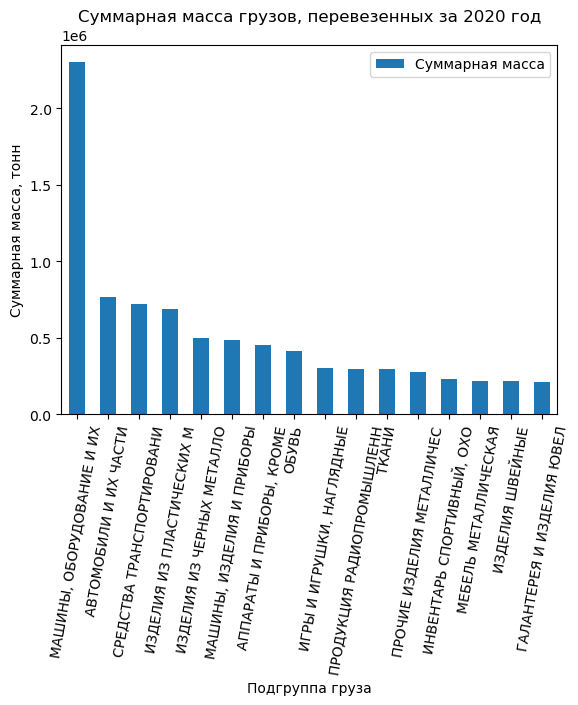

In [26]:
# пивот по сумарной массе
(
importt.pivot_table(index='Подгруппа груза', values='Суммарная масса', aggfunc='sum').sort_values(by='Суммарная масса', ascending=False)
.head(16)  
.plot(kind='bar')
)
plt.xticks(rotation=80)
plt.xlabel('Подгруппа груза')
plt.ylabel('Суммарная масса, тонн')
plt.title('Суммарная масса грузов, перевезенных за 2020 год');

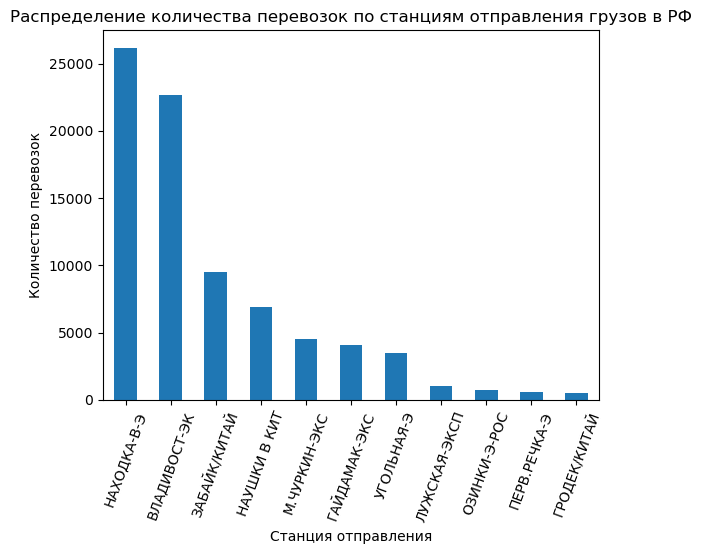

In [27]:
# таблица по городам станциям отправления грузов в РФ
(
importt['Станция отправления РФ'].value_counts()
.head(11)  
.plot(kind='bar')
)
plt.xticks(rotation=70)
plt.xlabel('Станция отправления')
plt.ylabel('Количество перевозок')
plt.title('Распределение количества перевозок по станциям отправления грузов в РФ');

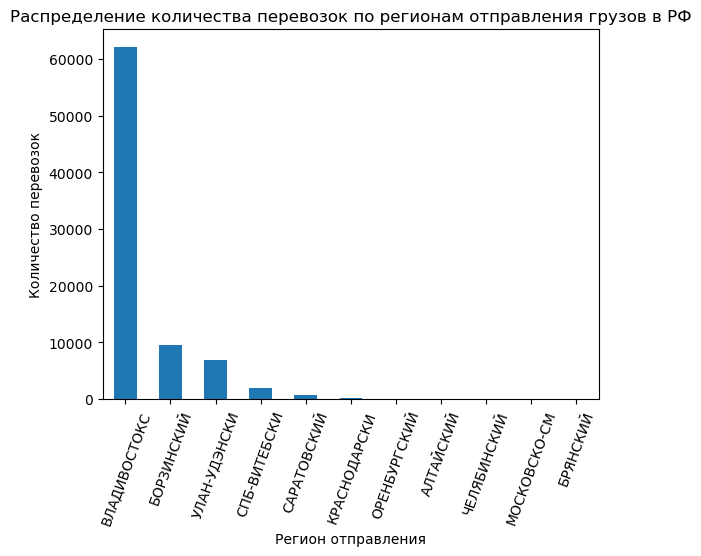

In [28]:
#таблица по регионам отправления в РФ
(
importt['Регион отпр'].value_counts()
.head(11)  
.plot(kind='bar')
)
plt.xticks(rotation=70)
plt.xlabel('Регион отправления')
plt.ylabel('Количество перевозок')
plt.title('Распределение количества перевозок по регионам отправления грузов в РФ');

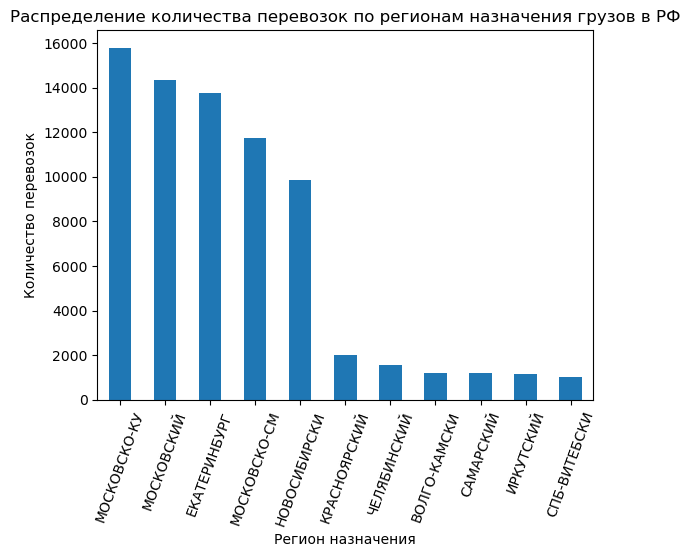

In [29]:
#таблица по региону назначения в РФ
(
importt['Регион наз'].value_counts()
.head(11)  
.plot(kind='bar')
)
plt.xticks(rotation=70)
plt.xlabel('Регион назначения')
plt.ylabel('Количество перевозок')
plt.title('Распределение количества перевозок по регионам назначения грузов в РФ');

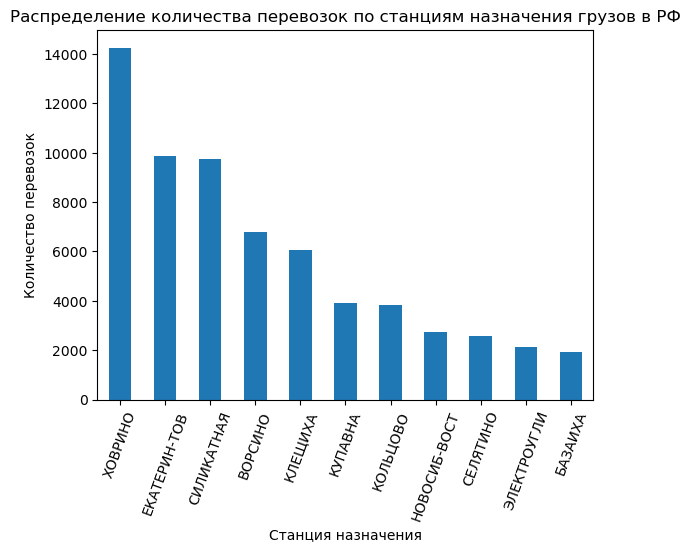

In [30]:
#таблица по станциям назначения в РФ
(
importt['Станция назначения РФ'].value_counts()
.head(11)  
.plot(kind='bar')
)
plt.xticks(rotation=70)
plt.xlabel('Станция назначения')
plt.ylabel('Количество перевозок')
plt.title('Распределение количества перевозок по станциям назначения грузов в РФ');

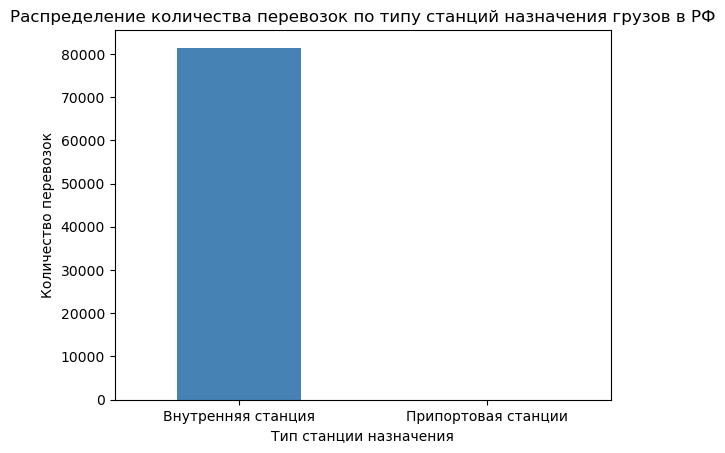

In [31]:
# тип станций назначения в РФ (график по типу перевозок сухопут/морские)
(
importt['Призн станц назн РФ'].value_counts()
.plot(kind='bar', color=my_colors)
)
plt.xticks(rotation=0)
plt.xlabel('Тип станции назначения')
plt.ylabel('Количество перевозок')
plt.title('Распределение количества перевозок по типу станций назначения грузов в РФ');